In [6]:
import torch 
import torch.nn as nn

In [7]:
### GPU 사용 확인 ###

print(f'GPU 사용가능 여부: {torch.cuda.is_available()}')
print(f'GPU 사용가능 개수 : {torch.cuda.device_count()}')
print(f'GPU 정보 반환 :  {torch.cuda.get_device_name(0)}')

GPU 사용가능 여부: True
GPU 사용가능 개수 : 2
GPU 정보 반환 :  NVIDIA GeForce RTX 2080 Ti


In [9]:
# 은닉층 1 / 2

class Net(nn.Module):
    def __init__(self, n_input, n_output, n_hidden):
        super().__init__()


        self.l1 = nn.Linear(n_input, n_hidden)
        self.l2 = nn.Linear(n_hidden, n_output)
        self.relu = nn.ReLU(inplace=True)
   
    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.relu(x1) #
        x3 = self.l2(x2)
        return x3

# --------------------------------------------------------------

class Net2(nn.Module):
    def __init__(self, n_input, n_output, n_hidden):
        super().__init__()

        self.l1 = nn.Linear(n_input, n_hidden)
        self.l2 = nn.Linear(n_hidden, n_hidden)
        self.l3 = nn.Linear(n_hidden, n_output)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.relu(x1) ##
        x3 = self.l2(x2)
        x4 = self.relu(x3) ##
        x5 = self.l3(x4)
        return x



In [13]:
conv1 = nn.Conv2d(3, 32, 3) # 입력채널, 출력 채널, 커널 사이즈 
relu = nn.ReLU(inplace=True)
conv2 = nn.Conv2d(32, 32, 3)
maxpool = nn.MaxPool2d((2,2))

print(conv1)
print('conv1 내부 변수 shape')
print(conv1.weight.shape)
print(conv1.bias.shape)
print('conv2 내부 변수 shape')
print(conv2.weight.shape)
print(conv2.bias.shape)

Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
conv1 내부 변수 shape
torch.Size([32, 3, 3, 3])
torch.Size([32])
conv2 내부 변수 shape
torch.Size([32, 32, 3, 3])
torch.Size([32])


In [18]:
# 더미 
inputs = torch.randn(100, 3, 32, 32)
print(f'inputs shape : {inputs.shape}')

# CNN 전반부 처리 시뮬레이션 

x1 = conv1(inputs)
x2 = relu(x1)
x3 = conv2(x2)
x4 = relu(x3)
x5 = maxpool(x4)

# shape 과정 
# 데이터 건수는 동일, 채널 수는 3채널(RGB)에서conv 에서 출력 채널을 32로 했기에 32로 바뀜 
# 화소는 합성곱 함수를 거칠때마다 '합성곱 처리 행렬의 사이즈-1' 만큼 줄어듬
# 화소는 풀링처리를 거치며 사이즈가 절반으로 줄어듬 

print('torch.Size([데이터 건수, 채널 수, 화소 수(2개)]')
print(inputs.shape)
print(x1.shape)
print(x2.shape)
print(x3.shape)
print(x4.shape)
print(x5.shape)


inputs shape : torch.Size([100, 3, 32, 32])
torch.Size([데이터 건수, 채널 수, 화소 수(2개)]
torch.Size([100, 3, 32, 32])
torch.Size([100, 32, 30, 30])
torch.Size([100, 32, 30, 30])
torch.Size([100, 32, 28, 28])
torch.Size([100, 32, 28, 28])
torch.Size([100, 32, 14, 14])


nn.Sequential // 컨테이너 

In [19]:
# nn.Sequential(컨테이너) 를 활용 
# 위 CNN 전반부 처리 시뮬레이션과 동일한 결과를 나타냄 

features = nn.Sequential(
    conv1,
    relu,
    conv2,
    relu,
    maxpool
)

outputs = features(inputs)
print(outputs.shape)

torch.Size([100, 32, 14, 14])


nn.Flatten
- 3계 텐서 형태의 데이터를 1계 텐서로 바꿔줌

In [21]:
flatten = nn.Flatten()

outputs2 = flatten(outputs)

print(f'flatten 사용 전 : {outputs.shape}')
print(f'flatten 사용 후 : {outputs2.shape}')

flatten 사용 전 : torch.Size([100, 32, 14, 14])
flatten 사용 후 : torch.Size([100, 6272])


eval_loss // 손실 계산 

In [40]:
def eval_loss(loader, device, net, criterion):
    
    # 데이터로더에서 처음 한 개 세트를 가져옴 
    for images, labels in loader:
        break 

    # 디바이스 할당 
    inputs = images.to(device)
    labels = labels.to(device) 

    # 예측계산 
    outputs = net(inputs)

    #손실계산
    loss = criterion(outputs, labels)

    return loss 

fit // 학습 

In [22]:
def fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, histroy):
    
    # tqdm 라이브러리 
    from tqdm import tqdm 
    base_epochs = len(histroy)

    for epoch in range(base_epochs, num_epochs+base_epochs):
        train_loss = 0
        train_acc = 0

        # 훈련 페이즈
        net.train() # Dropout / BatchNorm2d 를 위해 사용 
        count = 0

        for inputs, labels in tqdm(train_loader):
            count += len(labels)
            inputs = inputs.to(device)
            labels = labels.to(device) 

        # 예측 페이즈 
        net.eval() # Dropout / BatchNorm2d 를 위해 사용
        count = 0

        for inputs, labels in test_loader:
            count += len(labels)
            inputs = inputs.to(device)
            labels = labels.to(device)



eval_history // 학습 로그

In [81]:
import matplotlib.pyplot as plt

# 학습 로그 해석

def evaluate_history(history):
    # 손실과 정확도 확인
    print(f'초기상태 : 손실 : {history[0,3]:.5f}  정확도 : {history[0,4]:.5f}') 
    print(f'최종상태 : 손실 : {history[-1,3]:.5f}  정확도 : {history[-1,4]:.5f}' )

    num_epochs = len(history)
    unit = num_epochs / 10

    # 학습 곡선 출력(손실)
    plt.figure(figsize=(9,8))
    plt.plot(history[:,0], history[:,1], 'b', label='훈련')
    plt.plot(history[:,0], history[:,3], 'k', label='검증')
    plt.xticks(np.arange(0,num_epochs+1, unit))
    plt.xlabel('반복 횟수')
    plt.ylabel('손실')
    plt.title('학습 곡선(손실)')
    plt.legend()
    plt.show()

    # 학습 곡선 출력(정확도)
    plt.figure(figsize=(9,8))
    plt.plot(history[:,0], history[:,2], 'b', label='훈련')
    plt.plot(history[:,0], history[:,4], 'k', label='검증')
    plt.xticks(np.arange(0,num_epochs+1,unit))
    plt.xlabel('반복 횟수')
    plt.ylabel('정확도')
    plt.title('학습 곡선(정확도)')
    plt.legend()
    plt.show()

show_images_labels // 예측 결과 표시 

In [55]:


# 이미지와 라벨 표시
def show_images_labels(loader, classes, net, device):

    # 데이터로더에서 처음 1세트를 가져오기
    for images, labels in loader:
        break
    # 표시 수는 50개
    n_size = min(len(images), 50)

    if net is not None:
      # 디바이스 할당
      inputs = images.to(device)
      labels = labels.to(device)

      # 예측 계산
      outputs = net(inputs)
      predicted = torch.max(outputs,1)[1]
      #images = images.to('cpu')

    # 처음 n_size개 표시
    plt.figure(figsize=(20, 15))
    for i in range(n_size):
        ax = plt.subplot(5, 10, i + 1)
        label_name = classes[labels[i]]
        # net이 None이 아닌 경우는 예측 결과도 타이틀에 표시함
        if net is not None:
          predicted_name = classes[predicted[i]]
          # 정답인지 아닌지 색으로 구분함
          if label_name == predicted_name:
            c = 'k'
          else:
            c = 'b'
          ax.set_title(label_name + ':' + predicted_name, c=c, fontsize=20)
        # net이 None인 경우는 정답 라벨만 표시
        else:
          ax.set_title(label_name, fontsize=20)
        # 텐서를 넘파이로 변환
        image_np = images[i].numpy().copy()
        # 축의 순서 변경 (channel, row, column) -> (row, column, channel)
        img = np.transpose(image_np, (1, 2, 0))
        # 값의 범위를[-1, 1] -> [0, 1]로 되돌림
        img = (img + 1)/2
        # 결과 표시
        plt.imshow(img)
        ax.set_axis_off()
    plt.show()










torch_seed // 난수 고정 

In [56]:
def torch_seed(seed=123):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    # GPU 사용시 동일한 결과가 안나올수도 있어서 추가
    torch.backends.cudnn.deterministic = True
    torch.use_deterministic_algorithms = True


Transfroms 정의 

In [57]:
import torchvision.transforms as transforms

# transform1 - 1계 텐서화 

transform1 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
    transforms.Lambda(lambda x: x.view(-1)),
 ])


# transform2 - 정규화만 실시 

transform2 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
])


datasets // 데이터 취득용 함수 

In [58]:
import torchvision.datasets as datasets

data_root = './data'

# 훈련 데이터셋 (1계 텐서 버전)
train_set1 = datasets.CIFAR10(
    root = data_root, train = True, 
    download = True, transform = transform1)

# 검증 데이터셋 (1계 텐서 버전)
test_set1 = datasets.CIFAR10(
    root = data_root, train = False, 
    download = True, transform = transform1)

# 훈련 데이터셋 (3계 텐서 버전)
train_set2 = datasets.CIFAR10(
    root =  data_root, train = True, 
    download = True, transform = transform2)

# 검증 데이터셋 (3계 텐서 버전)
test_set2 = datasets.CIFAR10(
    root = data_root, train = False, 
    download = True, transform = transform2)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


데이터셋 확인 

In [59]:
image1, label1 = train_set1[0] # 1계 텐서 
image2, label2 = train_set2[0] # 3계 텐서 

print(image1.shape)
print(image2.shape)

torch.Size([3072])
torch.Size([3, 32, 32])


데이터로더 정의 

In [60]:
from torch.utils.data import DataLoader 

# 미니 배치 사이즈 지정
batch_size = 100

# 훈련용 데이터로더 1 // shuffle = True 
train_loader1 = DataLoader(train_set1, batch_size=batch_size, shuffle=True) 

# 검증용 데이터로더 1 // shuffle = False
test_loader1 = DataLoader(test_set1, batch_size=batch_size, shuffle=False)

# 훈련용 데이터로더 2
train_loader2 = DataLoader(train_set2, batch_size=batch_size, shuffle=True)

# 검증용 데이터로더 2
test_loader2 = DataLoader(test_set2, batch_size=batch_size, shuffle=False)


## 데이터로더 확인 

# train_loader1에서 한 세트 가져오기 
for images1, labels1 in train_loader1:
    break 

# test_loader2에서 한 세트 가져오기 
for images2, labels2 in test_loader2:
    break 

print(images1.shape)
print(images2.shape)



torch.Size([100, 3072])
torch.Size([100, 3, 32, 32])


검증 데이터를 이미지로 표시 

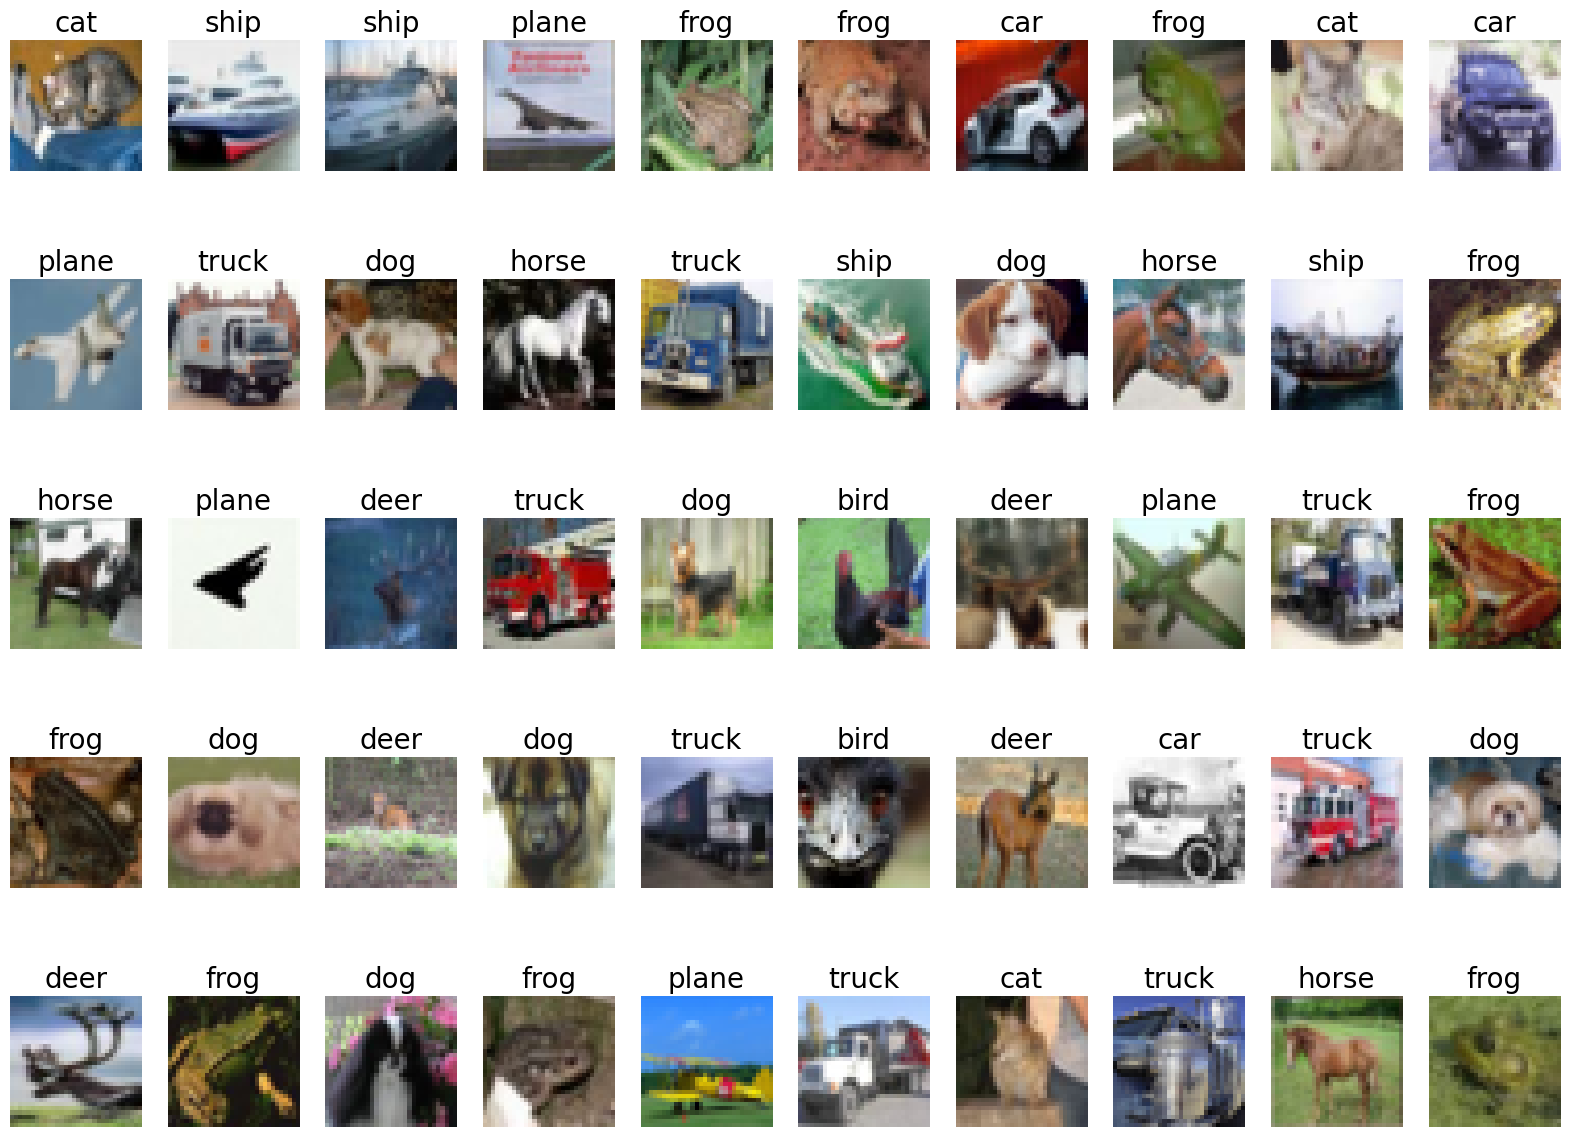

In [61]:
import numpy as np

classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

show_images_labels(test_loader2, classes, None, None)

모델 정의 // 전결합형 

In [62]:
# 입력 차원수는 3*32*32=3072
n_input = image1.view(-1).shape[0]

# 출력 차원수
# 분류 클래스의 수이므로　10
n_output = len(set(list(labels1.data.numpy())))

# 은닉층의 노드수
n_hidden = 128

# 결과 확인
print(f'n_input: {n_input}  n_hidden: {n_hidden} n_output: {n_output}')


n_input: 3072  n_hidden: 128 n_output: 10


In [63]:
# 모델 정의
# 3072입력 10출력 1은닉층을 포함한 신경망 모델

class Net(nn.Module):
    def __init__(self, n_input, n_output, n_hidden):
        super().__init__()

        # 은닉층 정의(은닉층의 노드수 : n_hidden)
        self.l1 = nn.Linear(n_input, n_hidden)

        # 출력층의 정의
        self.l2 = nn.Linear(n_hidden, n_output)

        # ReLU 함수 정의
        self.relu = nn.ReLU(inplace=True)
   
    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.relu(x1)
        x3 = self.l2(x2)
        return x3

In [64]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 모델 인스턴스 생성
net = Net(n_input, n_output, n_hidden).to(device)

# 손실 함수： 교차 엔트로피 함수
criterion = nn.CrossEntropyLoss()

# 학습률
lr = 0.01

# 최적화 함수: 경사 하강법
optimizer = torch.optim.SGD(net.parameters(), lr=lr)



In [65]:
# 모델 개요 표시 1
print(net)

Net(
  (l1): Linear(in_features=3072, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU(inplace=True)
)


In [66]:
from torchinfo import summary
# 모델 개요 표시 2
summary(net, (100,3072), depth=1)

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [100, 10]                 --
├─Linear: 1-1                            [100, 128]                393,344
├─ReLU: 1-2                              [100, 128]                --
├─Linear: 1-3                            [100, 10]                 1,290
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
Total mult-adds (M): 39.46
Input size (MB): 1.23
Forward/backward pass size (MB): 0.11
Params size (MB): 1.58
Estimated Total Size (MB): 2.92

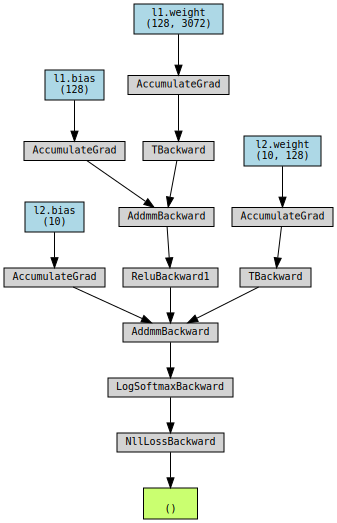

In [67]:
from torchviz import make_dot
# 손실 계산 

loss = eval_loss(test_loader1, device, net, criterion)

# 손실 계산 그래프 시각화 
g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

학습

In [68]:
import torch.optim as optim
# 난수 초기화
torch_seed()

# 모델 인스턴스 생성
net = Net(n_input, n_output, n_hidden).to(device)

# 손실 함수 : 교차 엔트로피 함수 
criterion == nn.CrossEntropyLoss()

# 학습률
lr = 0.01

# 최적화 함수 : 경사 하강법
optimizer = optim.SGD(net.parameters(), lr=lr)

# 반복 횟수 
num_epochs = 50

# 평가 결과 기록
history = np.zeros((0,5))

# 학습 
history = fit(net, optimizer, criterion, num_epochs, train_loader1, test_loader1, device, history)

100%|██████████| 500/500 [00:09<00:00, 53.01it/s]


In [ ]:
# 평가 

evaluate_history(history) 


모델 정의 (CNN)

In [74]:
class CNN(nn.Module):

    def __init__(self, n_output, n_hidden):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.conv2 = nn.Conv2d(32, 32, 3)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d((2,2))
        self.flatten = nn.Flatten()
        self.l1 = nn.Linear(6272, n_hidden)
        self.l2 = nn.Linear(n_hidden, n_output)

        self.features = nn.Sequential(
            self.conv1,
            self.relu,
            self.conv2,
            self.relu,
            self.maxpool
        )

        self.classifier = nn.Sequential(
            self.l1,
            self.relu,
            self.l2
        )

    def forward(self, x):
        x1 = self.features(x)
        x2 = self.flatten(x1)
        x3 = self.classifier(x2)
        return x3

net =CNN(n_output, n_hidden).to(device)
criterion = nn.CrossEntropyLoss()
lr=0.01
optimizer=torch.optim.SGD(net.parameters(),lr=lr)


In [75]:
# 모델 개요 1

print(net)

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (l1): Linear(in_features=6272, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=10, bias=True)
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=6272, out_features=128, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [76]:
# 모델 개요 2

summary(net, (100, 3, 32, 32), depth=1)

Layer (type:depth-idx)                   Output Shape              Param #
CNN                                      [100, 10]                 --
├─Sequential: 1-1                        [100, 32, 14, 14]         10,144
├─Sequential: 1-4                        --                        (recursive)
├─Sequential: 1-5                        --                        (recursive)
├─Sequential: 1-4                        --                        (recursive)
├─Sequential: 1-5                        --                        (recursive)
├─Flatten: 1-6                           [100, 6272]               --
├─Sequential: 1-7                        [100, 10]                 804,234
Total params: 814,378
Trainable params: 814,378
Non-trainable params: 0
Total mult-adds (M): 886.11
Input size (MB): 1.23
Forward/backward pass size (MB): 43.22
Params size (MB): 3.26
Estimated Total Size (MB): 47.71

결과 

In [79]:
torch_seed()

net = CNN(n_output, n_hidden).to(device)

criterion = nn.CrossEntropyLoss()

lr = 0.01

optimizer = optim.SGD(net.parameters(), lr=lr)

num_epochs = 20

history2 =np.zeros((0,5))

# 학습 
history2 = fit(net, optimizer, criterion, num_epochs, train_loader2, test_loader2, device, history2)

100%|██████████| 500/500 [00:09<00:00, 54.54it/s]


In [85]:
evaluate_history(history2)

TypeError: 'NoneType' object is not subscriptable